### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 2.3
### Profit and Loss of the Black-Scholes hedging
##### GNABEYEU MBIADA Emmanuel

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 

The present problem set refers to Section 9.2.6 of the lectures notes. Consider a European call option, with strike K > 0 and maturity T > 0. Then, given a volatility parameter $\Sigma$  > 0, the Profit and Loss induced by the Black-Scholes hedging is defined by: $PL^n_T(K):=X_T^{\Delta^{BS}}(K)−(S_T −K)^+.$

We want to simulate the Ornstein-Uhlenbeck process
$d\sigma_t=λ(c−\sigma_t)dt+γdW_t^{(2)}$
We recall that an explicit expression for the Ornstein-Uhlenbeck process $\sigma$ is available by applying Itˆo’s formula to $\sigma_te^{λt}$,
The solution is $\sigma_t=c+λ(\sigma_0-c)e^{-λt}+γ\int_{0}^{t} e^{-λ(t-s)}dW_s^{(2)}=c+λ(\sigma_0-c)e^{-λt}+γe^{-λt}\int_{0}^{t} e^{λs}dW_s^{(2)}$


In [230]:
T = 2
n = 100
S0 = 100
sigma0 = 0.2
lambda_ = 2.0
c = 0.4
gamma = 0.3
r=0.02
M = 1000

#### 1 build a program which produces a sample of M = 1000 copies of the discrete path  {$\sigma_{t^n_i}$ , i = 0, . . . , n}, $t^n_i := \frac{iT}{n}$. 

In [231]:
def compute_sigma_t(sigma0, c, lambda_, gamma, T, n, M=1000):
    """Ornstein-Uhlenbeck process.
    Args:
        M: number of copies (default=1000)
        n: discretisation number
    Output Shape:
        N * n
    """
    times = np.linspace(0, T, n, endpoint=True)[:,None]
    dt = T/n
    dwt = np.zeros((n, M))
    dwt[1:] = np.sqrt(dt)*np.random.randn(n-1, M)
    
    int_Term = np.cumsum(np.exp(lambda_*times)*dwt, axis=0)
    int_Term = np.exp(-lambda_*times)*int_Term
    
    sigma = c + (sigma0-c)*np.exp(-lambda_*times) + gamma*int_Term
    return np.transpose(sigma)

#### Display some representative paths, and comment.

Text(0.5, 1.0, 'Sample volatility processes $\\sigma_t$')

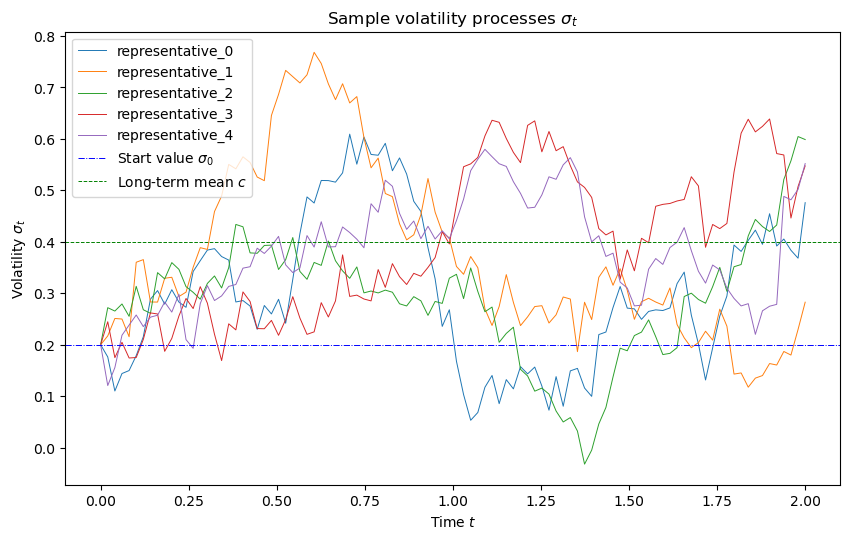

In [232]:
times = np.linspace(0, T, n, endpoint=True)
sigma_path = compute_sigma_t(sigma0, c, lambda_, gamma, T, n, M)

fig, ax1 = plt.subplots(1,1, figsize=(10,6), dpi=100)
for i in range(5):
    ax1.plot(times, sigma_path[i], linewidth=.7,label='representative_{:,.0f}'.format(i))
    
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('Volatility $\sigma_t$')
ax1.axhline(sigma0, times.min(), times.max(), c='blue', linewidth=.7, linestyle='-.', label="Start value $\sigma_0$")
ax1.axhline(c, times.min(), times.max(), c='green', linewidth=.7, linestyle='--', label="Long-term mean $c$")
ax1.legend()
ax1.set_title('Sample volatility processes $\sigma_t$')

>- *Comments:* The dynamics of the Ornstein-Uhlenbeck volatility $σ_t$ tend to the long term value c=0.4.

### 2. build a program which produces a sample of M = 1000 copies {$S_{t^n_i}$ , i =
### 0, . . . , n} of an appropriate discretization of S. Display some representa- tive paths, and produce the corresponding histogramme.

By definition, $ S_t :=S_0e^{−\frac{1}{2}\int_{0}^{t}\sigma_u^2du+\int_{0}^{t}\sigma_udW_u^{(1)}}$

In [233]:
def compute_asset_price_process(S0, sigma0, lambda_, c, gamma, T, n, M=1000):
    """Asset price process.
    Args:
        N: number of copies (default=1000)
        sigma_traj: volatility process (optional, generated by the function call), shape N * n
    
    Output Shape:
        N * n
    """
    # Realisation of sigma on [0, T]
    sigma_path = compute_sigma_t(sigma0, c, lambda_, gamma, T, n-1, M)
    # sigma_t(sigma0, c, lambda_, gamma, T, n-1, M).transpose()
    
    dt = T/n
    times = np.linspace(0, T, n, endpoint=True)
    
    # Volatility
    volatility_term = np.zeros((M, n))
    volatility_term[:,1:] = np.cumsum(np.power(sigma_path, 2)*dt, axis=1)
    
    # Sample of the brownian process
    dwt = np.sqrt(dt)*np.random.randn(n-1, M)
    
    # Drift term in the stochastic integral
    drift_term = np.zeros((M, n))
    drift_term[:,1:] = np.cumsum(sigma_path*dwt.transpose(), axis=1)
    
    return sigma_path, S0*np.exp(-0.5*volatility_term + drift_term)

Text(0.5, 1.0, 'Price process $S_t$')

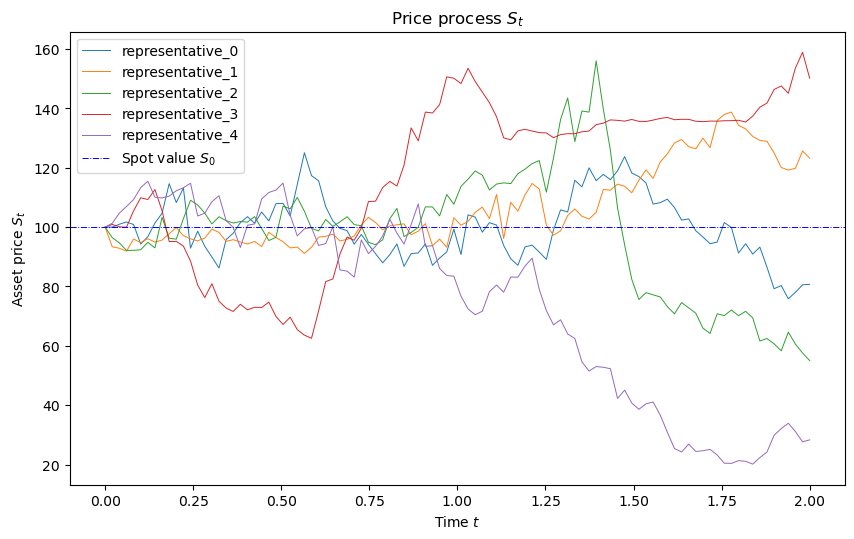

In [234]:
times = np.linspace(0, T, n, endpoint=True)
sigma_path,asset_path = compute_asset_price_process(S0, sigma0, lambda_, c, gamma, T, n, M=1000)

fig, ax1 = plt.subplots(1,1, figsize=(10,6), dpi=100)

for i in range(5):
    ax1.plot(times, asset_path[i], linewidth=.7,label='representative_{:,.0f}'.format(i))
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('Asset price $S_t$')
ax1.axhline(S0, times.min(), times.max(), c='blue', linewidth=.7, linestyle='-.',label="Spot value $S_0$")
ax1.legend()
ax1.set_title('Price process $S_t$')

#### Let's produce the corresponding histogramme

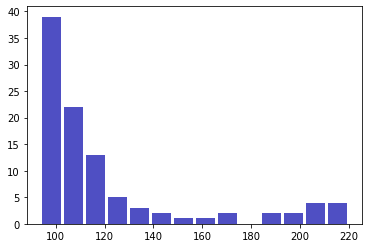

In [246]:
d=asset_path[5]
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

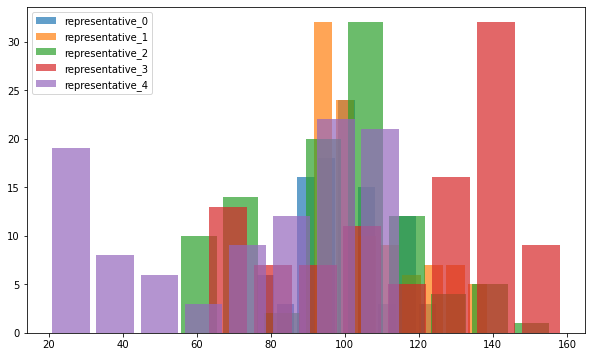

In [254]:
plt.figure(figsize=(10,6))
for i in range(5):
    plt.hist(x=asset_path[i], bins='auto',
                            alpha=0.7, rwidth=0.85,label='representative_{:,.0f}'.format(i))
plt.legend()

### 3. copies of an appropriate discretization of P&LT (Σ) for $\Sigma = \sigma_0$, K $\in$ {50 + j, j = 5,...,150}  and n $\in$ {50, 60, . . . , 100}. 


>- In this context, it is shown that the Profit and Loss reduces to: $PLT(Σ) = \frac{1}{2}\int_{0}^{T}e^{r(T−u)}  (\Sigma^2 −\sigma_u2) S_u^2 Γ^{BS}(u,S_u,\Sigma)du$ 
where the greek $Γ^{BS}(t, s, Σ) := ∂^2_{ss}BS(t, s, Σ)$

In [235]:
def d_plus(s,k,v):
    return np.log(s/k)/np.sqrt(v) + np.sqrt(v)/2

In [236]:
def Greek_gamma_BS(t, S0, sigma, K, r, T):
    """
    Greek gamma; second derivative of the Black-Scholes call price.
    Args:
        t: time to maturity (maturity - current time)
        r: interest rate
    """
    K_discounted = K*np.exp(-r*T) # discounted strike
    dp = d_plus(S0, K_discounted, sigma**2*T)
    
    return norm.pdf(dp)/ (S0*sigma*np.sqrt(T - t).reshape(-1,1))

In [237]:
def compute_profit_loss(sigma, r, K, S0, sigma0, c, lambda_, gamma, T, n, M):
    """
    Compute the profit and loss.
    
    Args:
        K: option strike array
        S0: spot price
    Returns:
        simulated volatility
    """
    dt = T/n

    # Compute asset price, shape N * n
    sigma_path,asset_path = compute_asset_price_process(S0, sigma0, lambda_, c, gamma, T, n, M)
  
    # Shape (n-1) * N
    asset_path = asset_path.T[:-1]
    sigma_path = sigma_path.T #[:-1]
    
    #asset_path = asset_path[:,:,None]
    #sigma_path = sigma_path[:,:,None]
    times = np.linspace(0, T, n)[:-1]
    
    # Shape (n-1) * N
    greek_gamma = Greek_gamma_BS(times, asset_path, sigma, K, r, T)
    
    # Make the integrand, shape N * n
    profit_loss_integrand = np.exp(r*(T - times).reshape(-1,1))*(sigma**2 - sigma_path**2)*(asset_path**2)*greek_gamma
    profit_loss =  0.5*np.sum(profit_loss_integrand*dt, axis=0)
    
    return sigma_path, profit_loss.T

In [238]:
sigma = sigma0
n=100
K=105
vol, pnl_sample = compute_profit_loss(sigma, r, K, S0, sigma0, c, lambda_, gamma, T, n, M)

In [239]:
sigma = sigma0
n_range = range(50,101,10)

K_range = np.array(range(55,201,1))

samples_matrix = np.empty((6, len(K_range), M))
sample_vols = []
for i,n in enumerate(n_range):
    for j,K in enumerate(K_range):
        volatility, pnl_sample = compute_profit_loss(sigma, r, K, S0, sigma0, c, lambda_, gamma, T, n, M)
        samples_matrix[i, j, :] = pnl_sample

### Compute the corresponding sample mean and variance.

In [240]:
means_matrix = samples_matrix.mean(axis=2)
varia_matrix = samples_matrix.std(axis=2)

In [245]:
means_matrix

array([[ -5.34778201,  -5.39009792,  -5.65960358,  -5.77607475,
         -5.95314497,  -6.15438739,  -6.83930841,  -6.91437904,
         -7.41217887,  -7.39902742,  -7.65164892,  -7.99260787,
         -8.63650402,  -8.53190012,  -8.96946853,  -9.59844326,
         -9.50689811,  -9.86938153, -10.06174286, -10.37105268,
        -10.85148472, -10.78362132, -10.81863411, -11.37487487,
        -12.2229983 , -12.47721697, -12.40001178, -12.93439372,
        -12.47841074, -13.03274017, -12.79072448, -13.67811223,
        -13.46989374, -14.00808467, -13.97398995, -13.33116134,
        -14.75980551, -14.31978155, -14.72939691, -15.00722092,
        -14.96332328, -14.51771138, -15.17949349, -15.64100174,
        -15.86664325, -15.71926303, -15.67625375, -15.59669854,
        -15.77194836, -16.80669422, -16.21596391, -16.14646649,
        -16.25355599, -16.12611575, -16.47685592, -16.73121175,
        -16.58634933, -15.83455876, -16.88969348, -16.89899017,
        -16.04739836, -16.42732073, -16.

#### Display some representative paths of mean and variance

Text(0.5, 1.0, 'P&L curve as a function of strike $K$')

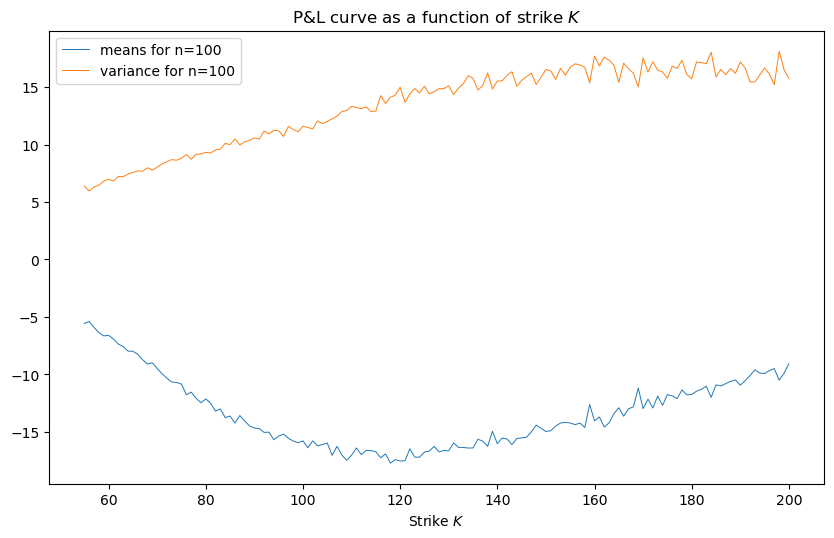

In [244]:
fig, ax0 = plt.subplots(1,1, figsize=(10,6), dpi=100)
ax0.plot(K_range, means_matrix[-1,:], linewidth=.7, label='means for n=100')
ax0.plot(K_range, varia_matrix[-1,:], linewidth=.7,label='variance for n=100')
ax0.set_xlabel('Strike $K$')
ax0.legend()
ax0.set_title('P&L curve as a function of strike $K$')